# Análisis Comparativo de Modelos de PLN para la Clasificación de Sentimiento en Tweets
####(Punto 2 del trabajo: Aplicaciones de la Arquitectura Transformer al Pronóstico y Procesamiento de Lenguaje Natural)

## **Descripción:**

Este Colab presenta un estudio comparativo de dos arquitecturas de procesamiento de lenguaje natural (PLN): una Red Neuronal Recurrente (RNN) y un modelo Transformer (BERT), aplicados a la clasificación de sentimiento en tweets. El dataset utilizado proviene de Twitter, conteniendo textos etiquetados con distintas categorías de sentimiento, lo cual aborda una problemática común en el análisis de redes sociales: la interpretación automática de las opiniones expresadas por los usuarios.

Problema a Resolver: Se explora la clasificación automática de sentimientos en tweets en varias categorías más allá de las básicas (positivo/negativo), lo que permite una comprensión más rica y matizada del estado emocional de los usuarios.

**Modelos Entrenados:**

Modelo RNN: Se entrena una Red Neuronal Recurrente con capas LSTM para capturar las dependencias temporales del texto.
Modelo Transformer (BERT): Se utiliza BERT, una arquitectura de Transformer preentrenada, adaptándola al contexto específico de nuestro dataset para clasificación multiclase.
Validación de Modelos: Se evalúa el rendimiento de ambos modelos mediante métricas de clasificación y matrices de confusión, proporcionando una comparativa directa de su eficacia y precisión.

Presentación de Modelos: Se incluyen los diagramas de las arquitecturas de ambos modelos y se detalla el cálculo de parámetros en cada capa, ofreciendo una visión clara de la estructura y complejidad de los modelos implementados.

## **Desarrollo:**

### Modelo 1: RNN

In [ ]:
# Montar Google Drive y cargar el dataset
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Mounted at /content/drive


In [ ]:
# Ruta al dataset
dataset_path = '/content/drive/MyDrive/dataSecurncial/Punto2/twitter_training.csv.zip'

# Cargar el dataset
dataset = pd.read_csv(dataset_path)
print(dataset)

       2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just realized that my Mac window partiti

In [ ]:
# Utilizar la columna de texto y la de etiqueta de sentimiento
tweets = dataset.iloc[:, 3].astype(str)  # Convertir a string
etiquetas = dataset.iloc[:, 2].values

# Codificar las etiquetas
label_encoder = LabelEncoder()
encoded_etiquetas = label_encoder.fit_transform(etiquetas)

# Preprocesamiento de los datos
# Tokenización
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(tweets)
word_index = tokenizer.word_index

# Convertir textos a secuencias
sequences = tokenizer.texts_to_sequences(tweets)

# Padding
padded = pad_sequences(sequences, maxlen=200)

# Convertir etiquetas a categóricas
etiquetas_categoricas = to_categorical(encoded_etiquetas)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_padded, test_padded, train_etiquetas, test_etiquetas = train_test_split(padded, etiquetas_categoricas, test_size=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 200, 64)           24832     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                                 
Total params: 357380 (1.36 MB)
Trainable params: 357380 (1.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



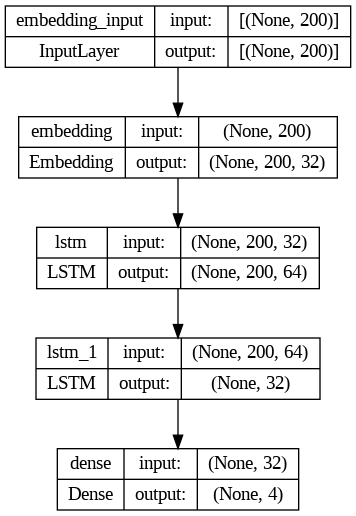

In [ ]:
# Definir el modelo RNN
model = Sequential()
model.add(Embedding(10000, 32, input_length=200))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(etiquetas_categoricas.shape[1], activation='softmax')) # Ajustar según el número de clases

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Visualización del modelo
print('')
plot_model(model, to_file='/content/drive/MyDrive/dataSecurncial/Punto2/model_rnn.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Entrenamiento del modelo
history = model.fit(train_padded, train_etiquetas, epochs=10, validation_data=(test_padded, test_etiquetas))

Epoch 1/10
1867/1867 [==============================] - 78s 38ms/step - loss: 0.9445 - accuracy: 0.6145 - val_loss: 0.7232 - val_accuracy: 0.7291
Epoch 2/10
1867/1867 [==============================] - 36s 19ms/step - loss: 0.5745 - accuracy: 0.7878 - val_loss: 0.6026 - val_accuracy: 0.7762
Epoch 3/10
1867/1867 [==============================] - 35s 19ms/step - loss: 0.4141 - accuracy: 0.8485 - val_loss: 0.4944 - val_accuracy: 0.8187
Epoch 4/10
1867/1867 [==============================] - 34s 18ms/step - loss: 0.3208 - accuracy: 0.8803 - val_loss: 0.4718 - val_accuracy: 0.8319
Epoch 5/10
1867/1867 [==============================] - 34s 18ms/step - loss: 0.2675 - accuracy: 0.8991 - val_loss: 0.4710 - val_accuracy: 0.8364
Epoch 6/10
1867/1867 [==============================] - 35s 19ms/step - loss: 0.2238 - accuracy: 0.9146 - val_loss: 0.4658 - val_accuracy: 0.8469
Epoch 7/10
1867/1867 [==============================] - 36s 19ms/step - loss: 0.1957 - accuracy: 0.9231 - val_loss: 0.4653 -

In [ ]:
# Guardar el modelo
model.save('/content/drive/MyDrive/dataSecurncial/Punto2/modelo_rnn_twitter_sentiment.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


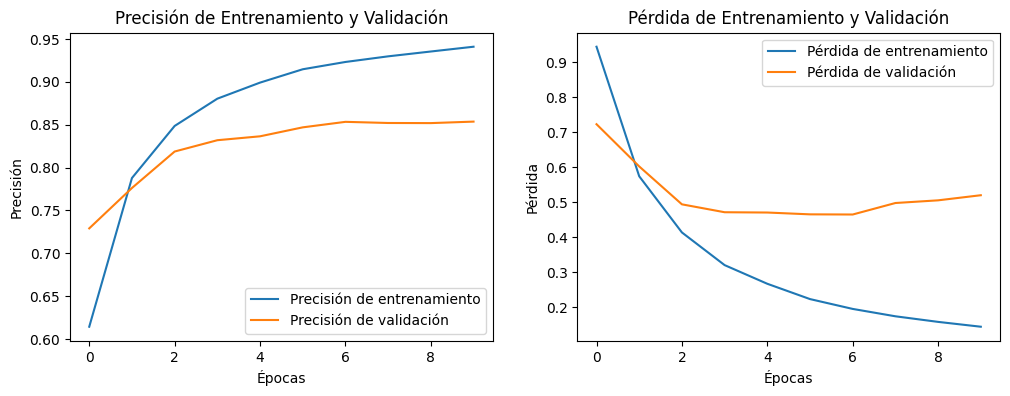

In [ ]:
# Gráficas de precisión de entrenamiento y validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráficas de pérdida de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

467/467 [==============================] - 5s 8ms/step


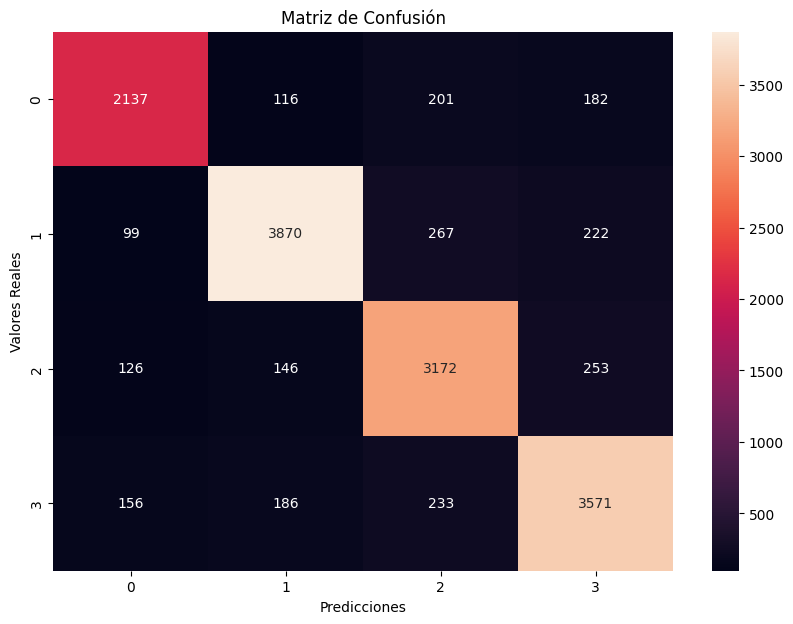

In [ ]:
# Generar matriz de confusión
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predecir las etiquetas en el conjunto de prueba
predicciones = model.predict(test_padded)
predicciones_etiquetas = np.argmax(predicciones, axis=1)
etiquetas_reales = np.argmax(test_etiquetas, axis=1)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_reales, predicciones_etiquetas)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Función para predecir la etiqueta de un tweet
def predecir_tweet(texto):
    secuencia = tokenizer.texts_to_sequences([texto])
    padded = pad_sequences(secuencia, maxlen=200)
    prediccion = model.predict(padded)
    clase_predicha = label_encoder.inverse_transform([np.argmax(prediccion)])
    print("Predicción:", prediccion, "\nClase Predicha:", clase_predicha[0])

In [ ]:
predecir_tweet("I wanna eat some sushi because I love it!")

1/1 [==============================] - 0s 61ms/step
Predicción: [[0.14957088 0.00481288 0.14384465 0.7017716 ]] 
Clase Predicha: Positive


### Modelo 2: Transformers (Bart)

In [ ]:
# Importar las bibliotecas necesarias
from google.colab import drive
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy as np
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Cargar el dataset desde Drive
dataset_path = '/content/drive/MyDrive/dataSecurncial/Punto2/twitter_training.csv.zip'
df = pd.read_csv(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Seleccionar las columnas de texto y etiqueta
tweets = df.iloc[:, 3].astype(str).values  # Texto del tweet
etiquetas = df.iloc[:, 2].values  # Etiquetas de sentimiento

# Codificar las etiquetas en formato numérico
label_encoder = LabelEncoder()
etiquetas_codificadas = label_encoder.fit_transform(etiquetas)
num_clases = len(np.unique(etiquetas_codificadas))

# Inicializar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Preprocesar los tweets para BERT
input_ids = []
attention_masks = []

for tweet in tweets:
    encoded_dict = tokenizer.encode_plus(
        tweet,
        add_special_tokens=True,  # Agregar '[CLS]' y '[SEP]'
        max_length=64,  # Definir la longitud máxima de los tweets
        truncation=True,
        padding='max_length',  # Rellenar con ceros
        return_attention_mask=True,  # Construir la máscara de atención
        return_tensors='np',  # Retornar tensores de NumPy
    )
    input_ids.append(encoded_dict['input_ids'][0])
    attention_masks.append(encoded_dict['attention_mask'][0])

# Convertir las listas a arrays de NumPy
input_ids = np.array(input_ids)
attention_masks = np.array(attention_masks)
etiquetas_codificadas = np.array(etiquetas_codificadas)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y validación
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(
    input_ids, etiquetas_codificadas, random_state=2018, test_size=0.1
)
train_masks, validation_masks, _, _ = train_test_split(
    attention_masks, etiquetas_codificadas, random_state=2018, test_size=0.1
)

# Definir el modelo Transformer para clasificación
model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased', num_labels=num_clases
)

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    [train_inputs, train_masks],
    train_labels,
    validation_data=([validation_inputs, validation_masks], validation_labels),
    batch_size=32,
    epochs=3
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
2101/2101 [==============================] - 929s 421ms/step - loss: 0.8205 - accuracy: 0.6757 - val_loss: 0.5048 - val_accuracy: 0.8130
Epoch 2/3
2101/2101 [==============================] - 891s 424ms/step - loss: 0.3274 - accuracy: 0.8803 - val_loss: 0.2697 - val_accuracy: 0.9011
Epoch 3/3
2101/2101 [==============================] - 891s 424ms/step - loss: 0.1614 - accuracy: 0.9383 - val_loss: 0.2460 - val_accuracy: 0.9143


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3076      
                                                                 
Total params: 109485316 (417.65 MB)
Trainable params: 109485316 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Guardar el modelo en el sistema de archivos de Google Colab
model.save_pretrained('/content/drive/MyDrive/dataSecurncial/Punto2/transformer_model')
tokenizer.save_pretrained('/content/drive/MyDrive/dataSecurncial/Punto2/transformer_model')

('/content/drive/MyDrive/dataSecurncial/Punto2/transformer_model/tokenizer_config.json',
 '/content/drive/MyDrive/dataSecurncial/Punto2/transformer_model/special_tokens_map.json',
 '/content/drive/MyDrive/dataSecurncial/Punto2/transformer_model/vocab.txt',
 '/content/drive/MyDrive/dataSecurncial/Punto2/transformer_model/added_tokens.json')

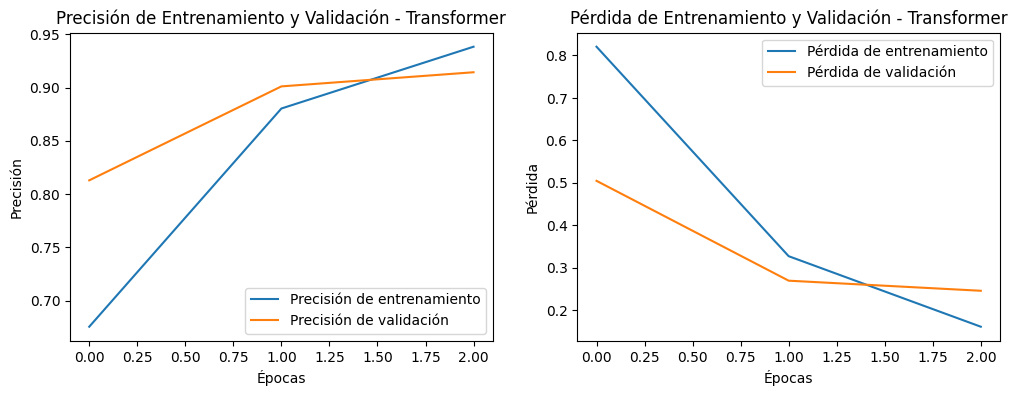

In [ ]:
import matplotlib.pyplot as plt

# Gráficas de precisión de entrenamiento y validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión de Entrenamiento y Validación - Transformer')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráficas de pérdida de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación - Transformer')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


234/234 [==============================] - 34s 134ms/step


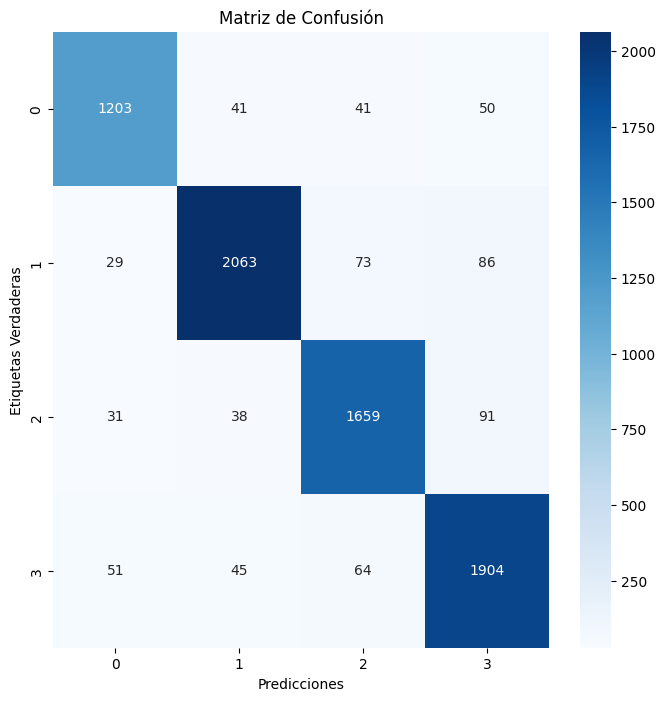

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Realizar predicciones en el conjunto de validación
validation_preds = model.predict([validation_inputs, validation_masks])

# Convertir las predicciones a etiquetas
validation_preds_labels = np.argmax(validation_preds.logits, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(validation_labels, validation_preds_labels)

# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Etiquetas Verdaderas')
ax.set_title('Matriz de Confusión')
plt.show()


In [ ]:
def predecir_sentimiento(tweet):
    # Preprocesar el tweet para BERT
    encoded_tweet = tokenizer.encode_plus(
        tweet,
        add_special_tokens=True,
        max_length=64,
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='tf',
    )

    # Realizar la predicción
    input_ids = encoded_tweet['input_ids']
    attention_mask = encoded_tweet['attention_mask']
    prediction = model.predict([input_ids, attention_mask])

    # Convertir la predicción a etiquetas
    prediction_label = np.argmax(prediction.logits, axis=1)

    # Decodificar la etiqueta
    predicted_label = label_encoder.inverse_transform(prediction_label)[0]

    return predicted_label


In [ ]:
# Ejemplo de uso: predecir el sentimiento de un nuevo tweet
tweet = "I don't need to buy that, are you trying to scam me!?"
print(predecir_sentimiento(tweet))


1/1 [==============================] - 5s 5s/step
Negative
